<a href="https://colab.research.google.com/github/kimminju99/Cifar-10_image_classification/blob/main/Project2_final_%EC%82%AC%EB%A7%9D%EB%85%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#google drive
from google.colab import drive
drive.mount('/content/gdrive')

import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
from keras.datasets import cifar10
from matplotlib import pyplot
import tensorflow.keras.optimizers as Optimizer
from sklearn.metrics import confusion_matrix
import random

Mounted at /content/gdrive


In [2]:
def show_accuracy(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, color = 'red', label='Training Accuracy')
    plt.plot(epochs_range, val_acc, color = 'blue', label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, color = 'red', label='Training Loss')
    plt.plot(epochs_range, val_loss, color = 'blue', label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [3]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
       print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    #     print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [4]:
#data 가져오기.
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

input_shape = x_train.shape[1:]
mean=[0,0,0]
std=[0,0,0]
newX_train = np.ones(x_train.shape)
newX_test = np.ones(x_test.shape)

origin_x_train = x_train
origin_x_test = x_test

for i in range(3):
    mean[i] = np.mean(x_train[:,:,:,i])
    std[i] = np.std(x_train[:,:,:,i])

for i in range(3):
    newX_train[:,:,:,i] = x_train[:,:,:,i] - mean[i]
    newX_train[:,:,:,i] = newX_train[:,:,:,i] / std[i]
    newX_test[:,:,:,i] = x_test[:,:,:,i] - mean[i]
    newX_test[:,:,:,i] = newX_test[:,:,:,i] / std[i]

x_train = newX_train
x_test = newX_test


170500096/170498071 [==============================] - 4s 0us/step


In [5]:
label =[]
for i in range(0,50000):
  label.append(y_train[i][0])
#print(label)

label_count =[]
for i in range(0,10):
  label_count.append(label.count(i))
print("train : ", label_count)

test_label =[]
for i in range(0,10000):
  test_label.append(y_test[i][0])

test_label_count =[]
for i in range(0,10):
  test_label_count.append(test_label.count(i))
print("test : ", test_label_count)

train :  [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]
test :  [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


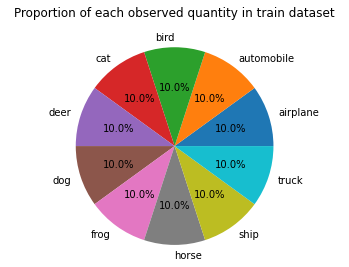

In [6]:
labels=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.pie(label_count,
       labels = labels,
        autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed quantity in train dataset\n')
plt.show()

In [7]:
batch_size = 16
num_classes = 10
epochs = 50
learningRate = 1e-4

img_rows = 32 #input image dimensions
img_cols = 32 

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

model = keras.Sequential([
    #layer1              
    layers.Conv2D(32, (3, 3), padding='same', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(32, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.2),

    #layer2
    layers.Conv2D(64, (3,3), padding='same'),
    #layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(64, (3,3), padding='same'),
    #layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.2),

    # #layer3
    # layers.Flatten(),
    # layers.Dense(512),
    # # #layers.BatchNormalization(),
    # layers.Activation('relu'),
    # #layers.Dropout(0.5),
    # #layer4

    layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(num_classes, activation = 'softmax'),
    # layers.Activation('softmax'),
])

model.compile(optimizer=Optimizer.Adam(learning_rate=learningRate), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

model.summary()

Epoch 1/50
3125/3125 [==============================] - 45s 4ms/step - loss: 1.7057 - accuracy: 0.3638 - val_loss: 1.4861 - val_accuracy: 0.4529
Epoch 2/50
3125/3125 [==============================] - 13s 4ms/step - loss: 1.4503 - accuracy: 0.4761 - val_loss: 1.3710 - val_accuracy: 0.5125
Epoch 3/50
3125/3125 [==============================] - 13s 4ms/step - loss: 1.3131 - accuracy: 0.5302 - val_loss: 1.2060 - val_accuracy: 0.5704
Epoch 4/50
3125/3125 [==============================] - 13s 4ms/step - loss: 1.2167 - accuracy: 0.5674 - val_loss: 1.1554 - val_accuracy: 0.5847
Epoch 5/50
3125/3125 [==============================] - 13s 4ms/step - loss: 1.1427 - accuracy: 0.5974 - val_loss: 1.0667 - val_accuracy: 0.6221
Epoch 6/50
3125/3125 [==============================] - 13s 4ms/step - loss: 1.0831 - accuracy: 0.6150 - val_loss: 0.9943 - val_accuracy: 0.6448
Epoch 7/50
3125/3125 [==============================] - 13s 4ms/step - loss: 1.0313 - accuracy: 0.6352 - val_loss: 0.9652 - val_ac

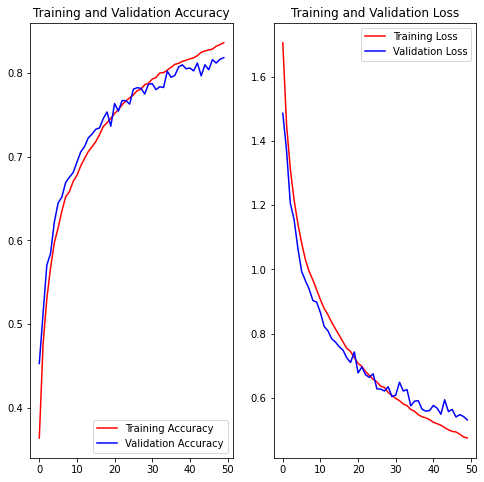

In [8]:
show_accuracy(history)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Confusion matrix, without normalization


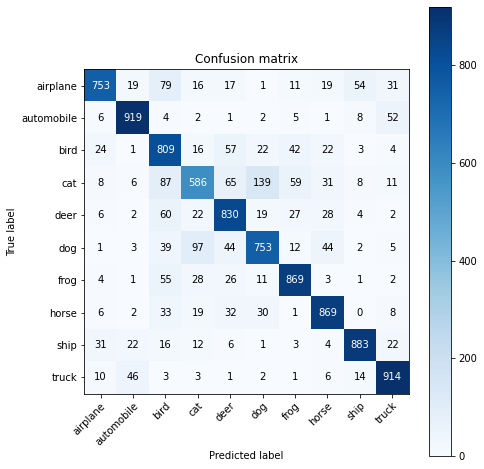

In [9]:
y_pred=model.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

#Compute the confusion matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=labels,
                      title='Confusion matrix')

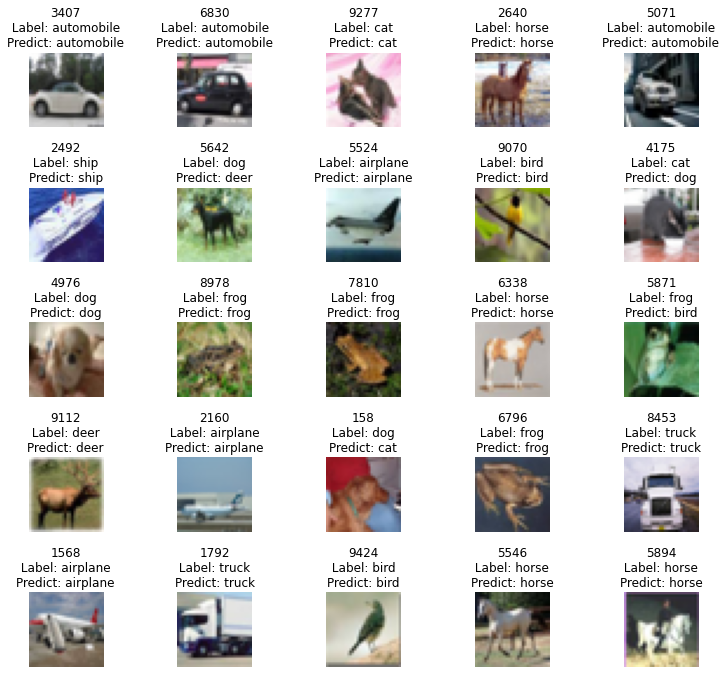

In [54]:
num_list = []
for _ in range(25):
  num = random.randrange(0,10000)
  while num in num_list:
    num = random.randrange(0,10000)
  num_list.append(num)

R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(-1,R*C-1):
    num = num_list[i]
    i= i+1
    axes[i].imshow(origin_x_test[num])
    axes[i].set_title("%s\n Label: %s \nPredict: %s" % (num,labels[y_true[num]], labels[y_pred[num]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


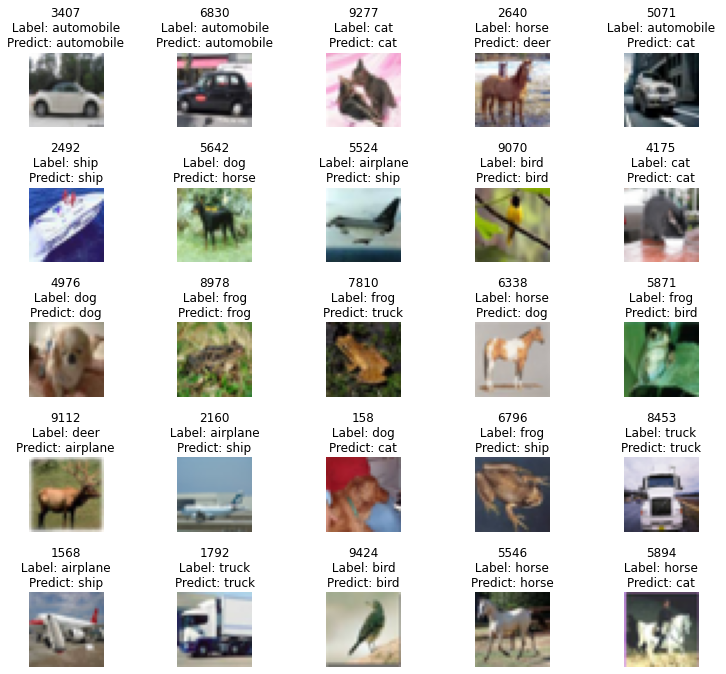

In [55]:
y_real_pred=model.predict_classes(origin_x_test)

R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(-1,R*C-1):
    num = num_list[i]
    i= i+1
    axes[i].imshow(origin_x_test[num])
    axes[i].set_title("%s\n Label: %s \nPredict: %s" % (num,labels[y_true[num]], labels[y_real_pred[num]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

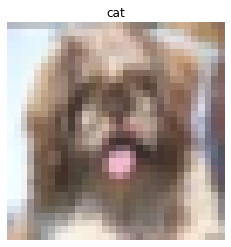

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


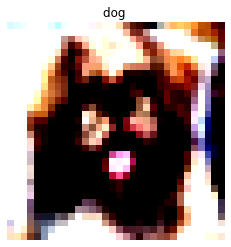

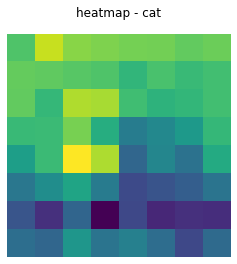

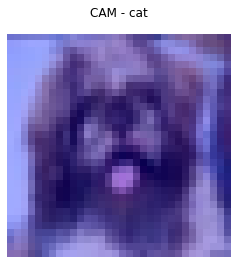

In [43]:
import matplotlib.image as mpimg
img_path = '/content/gdrive/My Drive/인공지능/bird.jpg'
#img = mpimg.imread(img_path)
img = origin_x_test[7926]

pred = model.predict(img.reshape(1,32,32,3))
pred_label = labels[np.argmax(pred)]

plt.figure(figsize=(4, 4))
plt.axis('off')
plt.title(pred_label)
plt.imshow(img)
plt.show()

after_pred = model.predict(x_test[7926].reshape(1,32,32,3))
after_pred_label = labels[np.argmax(after_pred)]

plt.figure(figsize=(4, 4))
plt.axis('off')
plt.title(after_pred_label+" ")
plt.imshow(x_test[7926])
plt.show()

# #******* gray scale **********
# R, G, B = img[:, :, 0], img[:, :, 1], img[:, :, 2]
# img = 0.2989*R + 0.5870*G + 0.1140*B
# plt.imshow(img, cmap = 'gray')
# plt.show()
# #******************************

from keras.preprocessing import image
#img = image.load_img(img_path, target_size = (32, 32))
x = image.img_to_array(img)

x = np.expand_dims(x, axis=0)

from keras.applications.vgg16 import preprocess_input
x = preprocess_input(x)

import pandas as pd
# from keras.applications.vgg16 import decode_predictions
# tf.keras.applications.resnet.decode_predictions
preds = model.predict(x)
# predictions = pd.DataFrame(decode_predictions(preds, top=3)[0],columns=['col1','category','probability']).iloc[:,1:]
predictions = pd.DataFrame(preds)
# print('PREDICTION:',predictions.loc[0,'category'])
# predictions

import seaborn as sns
# f = sns.barplot(data=predictions,color="red")
# sns.set_style(style='white')
# f.grid(False)
# f.spines["top"].set_visible(False)
# f.spines["right"].set_visible(False)
# f.spines["bottom"].set_visible(False)
# f.spines["left"].set_visible(False)
# f.set_title('Top 3 Predictions:')

argmax = np.argmax(preds[0]) #2
output = model.output[:, argmax]

from keras import backend as K
#********* heat map **********
last_conv_layer = model.get_layer('conv2d_4')

grad_model = tf.keras.models.Model(
    [model.inputs], [model.get_layer('conv2d_4').output, model.output]
)

pred_index = None

with tf.GradientTape() as tape:
  last_conv_layer_output, preds = grad_model(x)
  if pred_index is None:
    pred_index = tf.argmax(preds[0])
  class_channel = preds[:, pred_index]

grads = tape.gradient(class_channel, last_conv_layer_output)
pooled_grads = K.mean(grads, axis=(0,1,2))

last_conv_layer_output = last_conv_layer_output[0]
heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)

plt.matshow(heatmap)
plt.title('heatmap - '+pred_label)
plt.axis('off')
plt.show()

#********** Grad cam *************
import matplotlib.cm as cm
img = keras.preprocessing.image.img_to_array(img)

heatmap = np.uint8(255*heatmap)
jet = cm.get_cmap("jet")
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

plt.matshow(superimposed_img)
plt.title('CAM - '+pred_label)
plt.axis('off')
plt.show()

